<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Body" data-toc-modified-id="Body-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Body</a></span><ul class="toc-item"><li><span><a href="#Update-status-from-saved-outputs" data-toc-modified-id="Update-status-from-saved-outputs-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Update status from saved outputs</a></span></li><li><span><a href="#Plot-status" data-toc-modified-id="Plot-status-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Plot status</a></span></li><li><span><a href="#Overwrite-Status" data-toc-modified-id="Overwrite-Status-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Overwrite Status</a></span></li><li><span><a href="#Add-new-experiments" data-toc-modified-id="Add-new-experiments-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Add new experiments</a></span></li><li><span><a href="#Summary-figure-showing-model-weightings-for-all-216-GIA-model" data-toc-modified-id="Summary-figure-showing-model-weightings-for-all-216-GIA-model-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Summary figure showing model weightings for all 216 GIA model</a></span></li></ul></li></ul></div>

# Imports

In [2]:
import numpy as np
# from scipy.interpolate import interp1d, UnivariateSpline
from matplotlib import pyplot as plt
import matplotlib.cm as cm
# from scipy import ndimage
# import arviz as az
import pandas as pd
# from scipy.io import loadmat
# import scipy
# from scipy.ndimage import gaussian_filter as gaussian
# from copy import copy
# import pickle
import os
%matplotlib inline
import seaborn as sns
# from PIL import Image
from shutil import copyfile
sns.set_style("ticks")
sns.set_context("talk")
# import pymc3 as pm

from pathlib import Path

PROJECT_ROOT = Path.cwd().parents[0]
model_dir = PROJECT_ROOT / "model_outputs/"
data_dir = PROJECT_ROOT / "data/"
# import warnings

# warnings.filterwarnings("ignore")
from IPython.display import clear_output

# import theano.tensor as tt
# from theano import shared
# from pymc3.distributions.dist_math import SplineWrapper

# Body

## Update status from saved outputs

In [198]:
inference_status=pd.read_csv(PROJECT_ROOT/'notebooks/inference_status.csv',index_col=0)

traces = os.listdir(PROJECT_ROOT / "model_outputs/pymc3_traces")
traces = ['output'+t[:-4] for t in traces]
for T in traces:
    inference_status.at[T,'posterior_trace']=True

posteriors = os.listdir(PROJECT_ROOT / "model_outputs/pymc3_post_predict")
posteriors = ['output'+p[:-4] for p in posteriors]
for P in posteriors:
    inference_status.at[P,'posterior_predict']=True
    
inference_status.to_csv('inference_status.csv')

## Plot status

In [219]:
inference_status=pd.read_csv(PROJECT_ROOT/'notebooks/inference_status.csv',index_col=0)

In [220]:
experiments = [
    ["Lambeck", "S", 96],
    ["Colleoni", "S", 96],
    ["ICE6G", "S", 96],
    ["Lambeck", "T", 96],
    ["Colleoni", "T", 96],
    ["ICE6G", "T", 96],
    ["Lambeck", "S", 71],
    ["Colleoni", "S", 71],
    ["ICE6G", "S", 71],
    ["Lambeck", "T", 71],
    ["Colleoni", "T", 71],
    ["ICE6G", "T", 71],
    ["Lambeck", "S", 48],
    ["Colleoni", "S", 48],
    ["ICE6G", "S", 48],
    ["Lambeck", "T", 48],
    ["Colleoni", "T", 48],
    ["ICE6G", "T", 48],
]

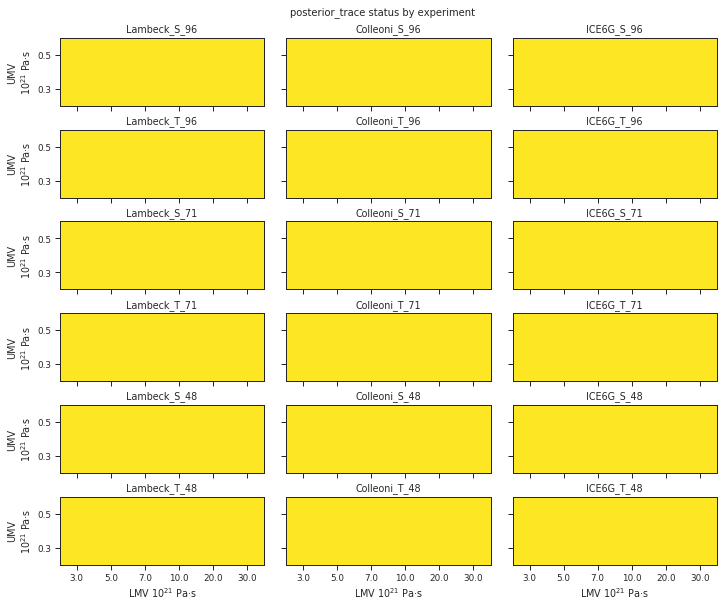

In [221]:
fig=plot_status(inference_status,experiments,'posterior_trace')

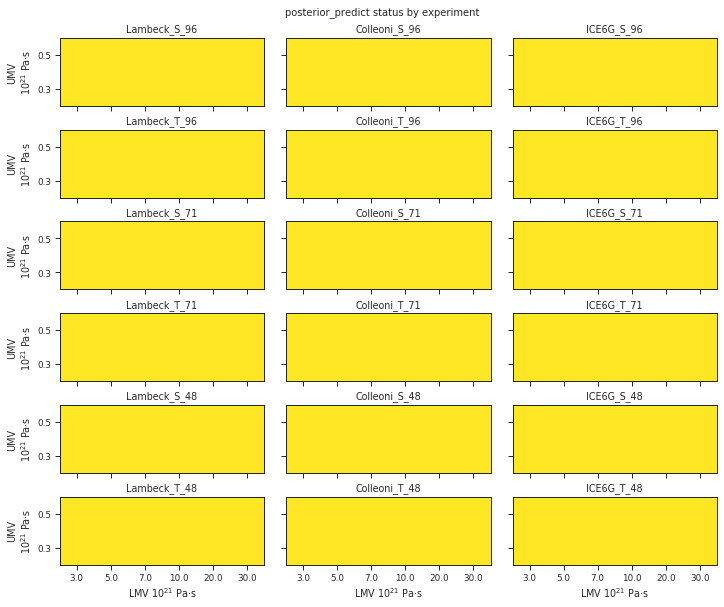

In [222]:
fig=plot_status(inference_status,experiments,'posterior_predict')

## Overwrite Status

In [184]:
inference_status=pd.read_csv(PROJECT_ROOT/'notebooks/inference_status.csv',index_col=0)

#output48Cp310_Colleoni_Wael_T example
f = '71Cp330_Colleoni_Wael_S'
inference_status.at['output'+f,'posterior_trace'] = False

In [197]:
subdirs = ['pymc3_traces','arviz_traces','pymc3_post_predict']
for s in subdirs:
    src = PROJECT_ROOT / "model_outputs"/s
    dst = PROJECT_ROOT / "model_outputs/backup"/s
    try:
        copyfile(str(src)+'/'+f+'.pkl', str(dst)+'/'+f+'.pkl')
        print(s+'/'+f+'.pkl backed up, deleting original')
        os.remove(str(src)+'/'+f+'.pkl')
    except FileNotFoundError:
        print('No existing file in '+s+' found for backup')

No existing file in pymc3_traces found for backup
No existing file in arviz_traces found for backup
No existing file in pymc3_post_predict found for backup


In [175]:
inference_status.to_csv('inference_status.csv')


## Add new experiments
This block will add new model names to the experiment list to integrate with the inference loops

In [ ]:
## load new model names
## parse new model lith/lmv/umv/ice/esl
## add new model names and props to the current inference list

['output71Cp330_Colleoni_Wael_S']

In [179]:
src = PROJECT_ROOT / "model_outputs"

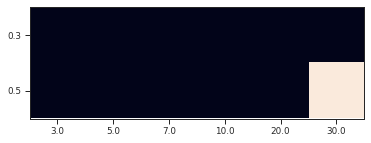

In [73]:
x_ax=filtered["LMV"] / 1e21
y_ax=filtered["UMV"] / 1e21

A=np.zeros((y_ax.unique().size,x_ax.unique().size))

y_all =np.sort(y_ax)
x_all =np.sort(x_ax)

y_ax = np.sort(y_ax.unique())
x_ax = np.sort(x_ax.unique())

for x,y in zip(x_all,y_all):
A[-1,-1]=1

plt.imshow(A,interpolation='nearest')
_=plt.gca().set_yticks(np.arange(y_ax.size))
_=plt.gca().set_xticks(np.arange(x_ax.size))
_=plt.gca().set_yticklabels(y_ax)
_=plt.gca().set_xticklabels(x_ax)
plt.gca().set_aspect(1)

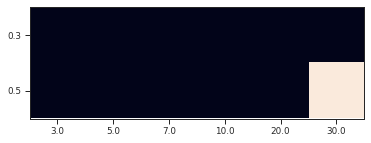

In [88]:
lmv = filtered["LMV"] / 1e21
umv = filtered["UMV"] / 1e21
vals = filtered['posterior_trace']

lmv_vals, lmv_idx = np.unique(lmv, return_inverse=True)
umv_vals, umv_idx = np.unique(umv, return_inverse=True)
vals_array = np.empty(lmv_vals.shape + umv_vals.shape)
vals_array.fill(np.nan) # or whatever yor desired missing data flag is
vals_array[lmv_idx, umv_idx] = vals
vals_array=vals_array.T
plt.imshow(vals_array,interpolation='nearest')
_=plt.gca().set_yticks(np.arange(y_ax.size))
_=plt.gca().set_xticks(np.arange(x_ax.size))
_=plt.gca().set_yticklabels(y_ax)
_=plt.gca().set_xticklabels(x_ax)
plt.gca().set_aspect(1)

In [86]:
filtered.at['output96Cp530_Lambeck_Wael_S','posterior_trace']=True

In [87]:
filtered

,LMV,UMV,lithosphere,ice_history,esl_curve,deglacial_rate,posterior_trace,posterior_predict,hmc_divergences
output96Cp520_Lambeck_Wael_S,2.000000e+22,5.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp320_Lambeck_Wael_S,2.000000e+22,3.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp530_Lambeck_Wael_S,3.000000e+22,5.000000e+20,96,Lambeck,Wael,S,True,False,0
output96Cp35_Lambeck_Wael_S,5.000000e+21,3.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp37_Lambeck_Wael_S,7.000000e+21,3.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp330_Lambeck_Wael_S,3.000000e+22,3.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp510_Lambeck_Wael_S,1.000000e+22,5.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp53_Lambeck_Wael_S,3.000000e+21,5.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp33_Lambeck_Wael_S,3.000000e+21,3.000000e+20,96,Lambeck,Wael,S,False,False,0
output96Cp310_Lambeck_Wael_S,1.000000e+22,3.000000e+20,96,Lambeck,Wael,S,False,False,0


In [7]:
names=os.listdir(PROJECT_ROOT/'model_outputs/pymc3_traces')
names=[t[:-4] for t in traces]
names

'48Cp320_Lambeck_Wael_S'

In [ ]:
def add_experiment(name,lith,lmv,umv,ice,esl):
    experiment={}
    props=[name,lith,lmv,umv,ice,esl]
    for p in props:
        experiment[p]=p

In [133]:
def plot_status(dataframe,experiments,value):
    sns.set_context("paper")
    fig = plt.figure(figsize=(12, 8))


    for i in range(0, 18):
        experiment = experiments[i]
        plt.subplot(6, 3, 1 + i)

        experiment = experiments[i]
        filtered = dataframe[
                (dataframe.ice_history == experiment[0])
                & (dataframe.deglacial_rate == experiment[1])
                & (dataframe.lithosphere == experiment[2])
            ]

        lmv = filtered["LMV"] / 1e21
        umv = filtered["UMV"] / 1e21
        vals = filtered[value]

        lmv_vals, lmv_idx = np.unique(lmv, return_inverse=True)
        umv_vals, umv_idx = np.unique(umv, return_inverse=True)
        vals_array = np.empty(lmv_vals.shape + umv_vals.shape)
        vals_array.fill(np.nan) # or whatever yor desired missing data flag is
        vals_array[lmv_idx, umv_idx] = vals
        vals_array=vals_array.T
        plt.imshow(vals_array,interpolation='nearest',cmap='viridis',vmin=0,vmax=1)
        _=plt.gca().set_yticks(np.arange(umv.unique().size))
        _=plt.gca().set_xticks(np.arange(lmv.unique().size))
        _=plt.gca().set_yticklabels(np.sort(umv.unique()))
        _=plt.gca().set_xticklabels(np.sort(lmv.unique()))
        plt.gca().invert_yaxis()
        plt.gca().set_aspect(1)

        if i > 14:
            plt.gca().set_xlabel("LMV $10^{21}$ Pa·s")
        else:
            plt.gca().set_xticklabels([])
        if i % 3 == 0:
            plt.gca().set_ylabel("UMV\n$10^{21}$ Pa·s")
        else:
            plt.gca().set_yticklabels([])

        plt.minorticks_off()
        plt.gca().set_title(experiment[0] + "_" + experiment[1] + "_" + str(experiment[2]))

    plt.suptitle(str(value)+' status by experiment',fontsize=10,y=1.03)
    fig.tight_layout()
    fig.tight_layout(pad=0, w_pad=-10, h_pad=0.5)
    
    return fig